## **NETFLIX MOVIES AND TV SHOWS CLUSTERING**

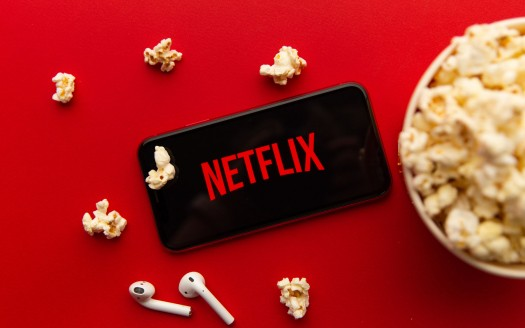

### **Project Type - Unsupervised**

### **Team Member - Individual**

## **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## **In this project, you are required to do**

1.Exploratory Data Analysis

2.Understanding what type content is available in different countries

3.Is Netflix has increasingly focusing on TV rather than movies in recent years.

4.Clustering similar content by matching text-based features.



## **Attribute Information**

show_id : Unique ID for every Movie / Tv Show

type : Identifier - A Movie or TV Show

title : Title of the Movie / Tv Show

director : Director of the Movie

cast : Actors involved in the movie / show

country : Country where the movie / show was produced

date_added : Date it was added on Netflix

release_year : Actual Releaseyear of the movie / show

rating : TV Rating of the movie / show

duration : Total Duration - in minutes or number of seasons

listed_in : Genere

description: The Summary description

In [ ]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [ ]:
import io
df = pd.read_csv('path')
# Dataset is now stored in a Pandas Dataframe
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
# Checking the shape of the dataframe
df.shape

(8807, 12)

In [ ]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### **Data processing**

In [ ]:
#Drop duplicates
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [ ]:
#Checking Null Values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
#total null values
df.isnull().sum().sum()

4307

In [ ]:
# Handling Null Values
df['cast'].fillna(value='No Cast', inplace=True)
df['country'].fillna(value=df['country'].mode()[0],inplace=True)

In [ ]:
#'date_added' and 'rating' contains an insignificant portion of the data so we will drop them from the dataset
df.dropna(subset=['date_added','rating','duration'],inplace=True)

In [ ]:
#Dropping Director Column
df.drop(['director'],axis=1,inplace=True)

In [ ]:
#again checking is there any null values are not
df.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### **EDA**

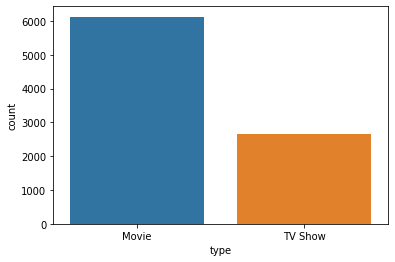

In [ ]:
#countplot to visualize the number of movies and tv_shows in type column
sns.countplot(df['type'])

 There are more number movies on Netflix than TV shows.

In [ ]:
df['rating']

0       PG-13
1       TV-MA
2       TV-MA
3       TV-MA
4       TV-MA
        ...  
8802        R
8803    TV-Y7
8804        R
8805       PG
8806    TV-14
Name: rating, Length: 8790, dtype: object

In [ ]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_ages'] = df['rating'].replace(ratings)

In [ ]:
# type should be a categorical
df['type'] = pd.Categorical(df['type'])
df['target_ages'] = pd.Categorical(df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [ ]:
df

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages
0,s1,Movie,Dick Johnson Is Dead,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Adults
3,s4,TV Show,Jailbirds New Orleans,No Cast,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Adults
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",Adults
8803,s8804,TV Show,Zombie Dumb,No Cast,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",Older Kids
8804,s8805,Movie,Zombieland,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Adults
8805,s8806,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Older Kids


In [ ]:
#creating two extra columns
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

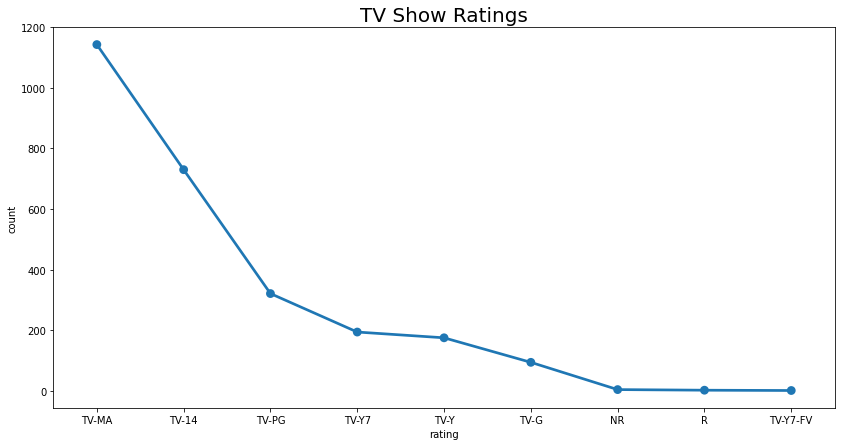

In [ ]:
#Rating based on rating system of all TV Shows
tv_ratings = tv_shows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (14,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('TV Show Ratings',size='20')
plt.show()

TV-MA has the highest number of ratings for tv shows i,e adult ratings

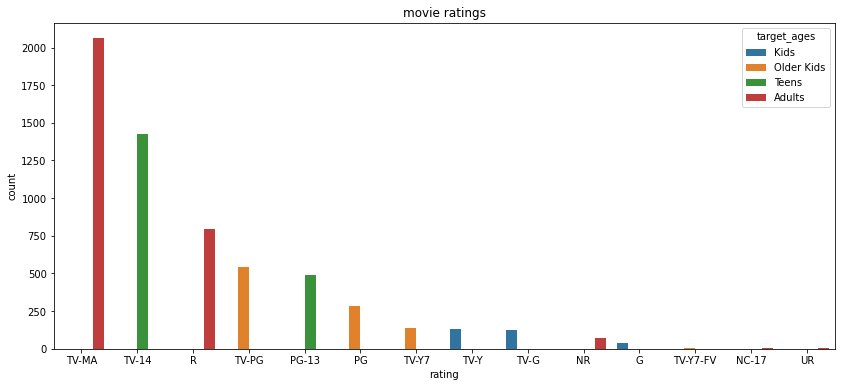

In [ ]:
#Movie Ratings based on Target Age Groups
plt.figure(figsize=(14,6))
plt.title('movie ratings')
sns.countplot(x=movies['rating'],hue=movies['target_ages'],data=movies,order=movies['rating'].value_counts().index)

TV-MA has the highest number of ratings for tv shows i,e adult ratings in both the cases TV-MA has the highest number of ratings.

In [ ]:
movies_year =movies['release_year'].value_counts().sort_index(ascending=False)
tvshows_year =tv_shows['release_year'].value_counts().sort_index(ascending=False)

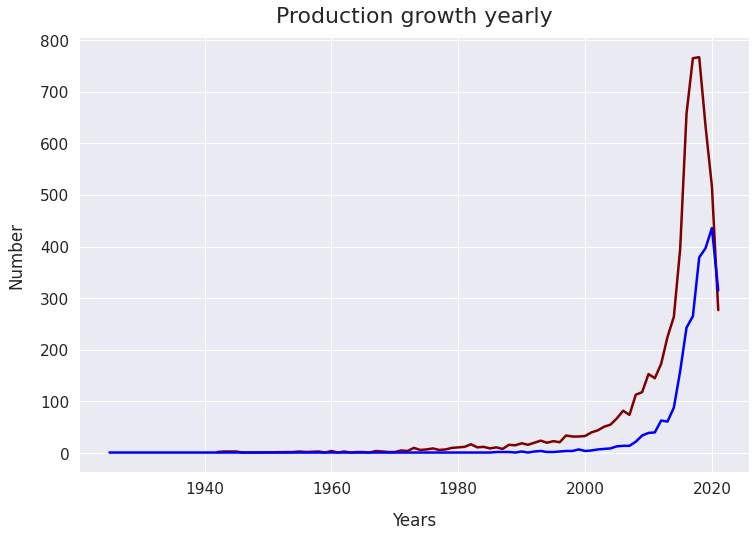

In [ ]:
# visualizing the movies and tv_shows based on the release year
sns.set(font_scale=1.4)
movies_year.plot(figsize=(12, 8), linewidth=2.5, color='maroon',label="Movies / year",ms=3)
tvshows_year.plot(figsize=(12, 8), linewidth=2.5, color='blue',label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.title("Production growth yearly", y=1.02, fontsize=22);

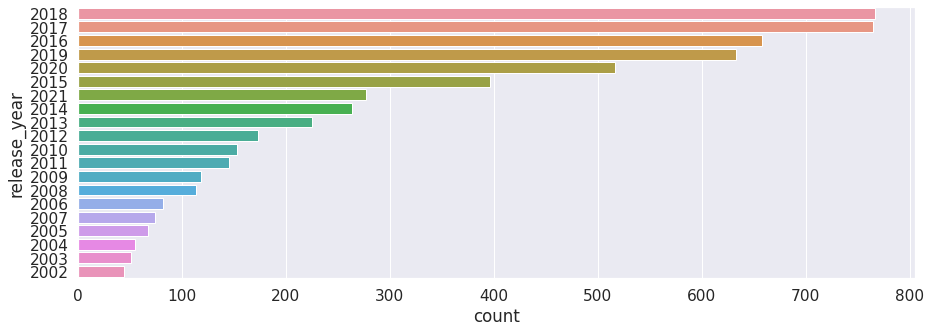

In [ ]:
#Analysing how many movies released per year in last 20 years
plt.figure(figsize=(15,5))
sns.countplot(y=movies['release_year'],data=df,order=movies['release_year'].value_counts().index[0:20])

Highest number of movies were released in 2018 and 2017

The number of movies on Netflix is growing significantly faster than the number of TV shows.

We saw a huge increase in the number of movies and television episodes after 2015.


It appears that Netflix has focused more attention on increasing Movie content that TV Shows. Movies have increased much more dramatically than TV shows.

In [ ]:
#adding columns of month and year of addition
df['month'] = pd.DatetimeIndex(df['date_added']).month
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month
0,s1,Movie,Dick Johnson Is Dead,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens,9
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults,9
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Adults,9
3,s4,TV Show,Jailbirds New Orleans,No Cast,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Adults,9
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Adults,9


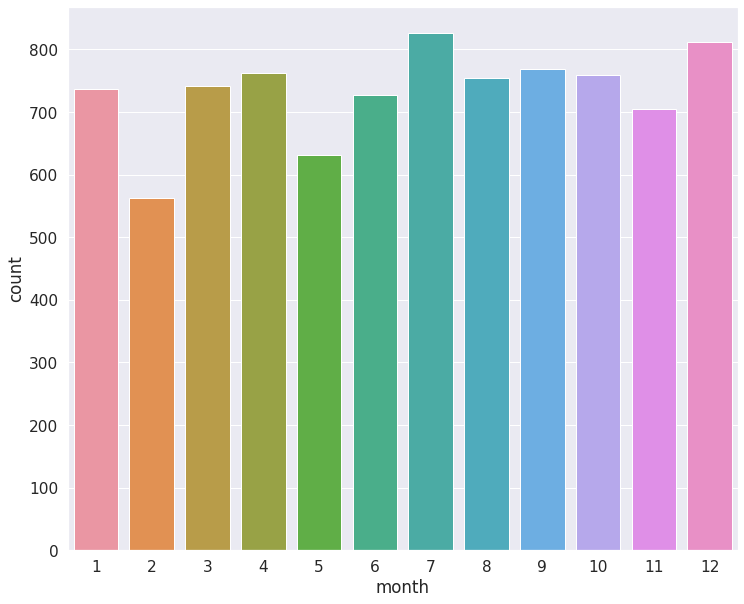

In [ ]:
# Plotting the Countplot
plt.figure(figsize=(12,10))
ax=sns.countplot('month',data= df)

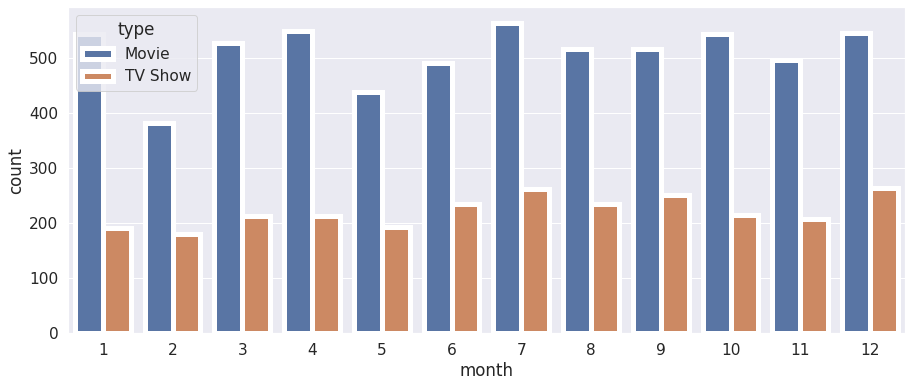

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))

sns.countplot(x='month', hue='type',lw=5, data=df, ax=ax)

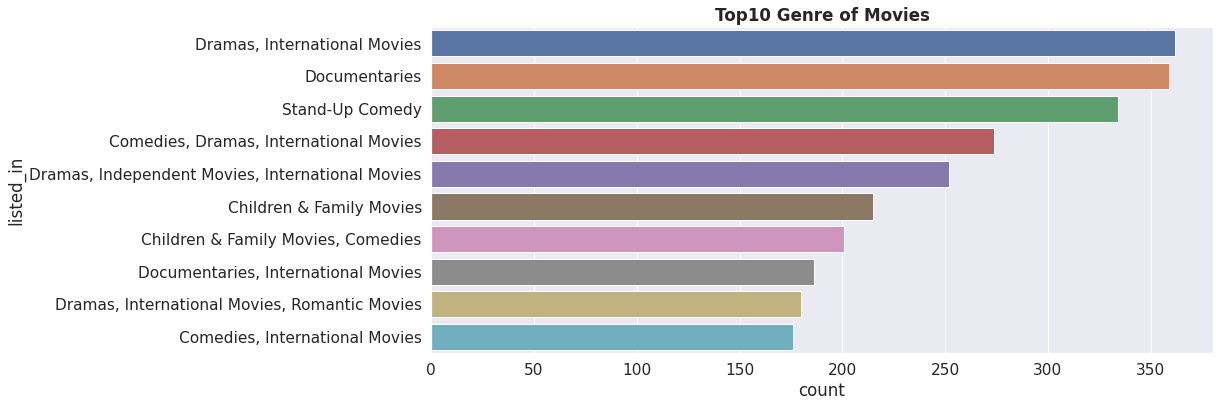

In [ ]:
#Analysing top10 genre of the movies
plt.figure(figsize=(14,6))
plt.title('Top10 Genre of Movies',fontweight="bold")
sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:10])

Dramas,International Movies are the top most genre in netflix followed by Documentaries.

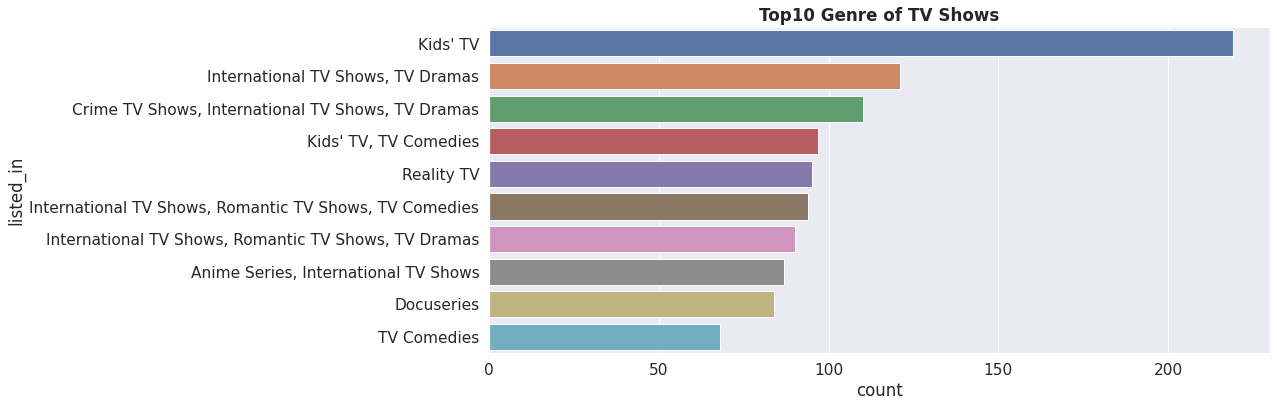

In [ ]:
#Analysing top10 genres of TVSHOWS
plt.figure(figsize=(14,6))
plt.title('Top10 Genre of TV Shows',fontweight="bold")
sns.countplot(y=tv_shows['listed_in'],data=tv_shows,order=tv_shows['listed_in'].value_counts().index[0:10])

Kids tv is the top most TV show genre in netflix.

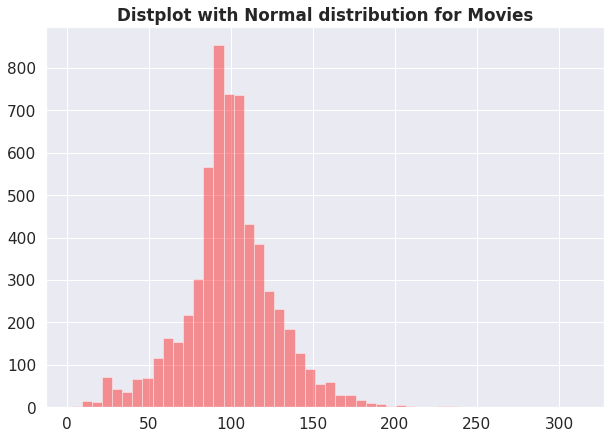

In [ ]:
#Checking the distribution of Movie Durations
plt.figure(figsize=(10,7))
sns.distplot(movies['duration'].str.extract('(\d+)'),kde=False, color=['red'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

Most of the movies have duration of between 50 to 150

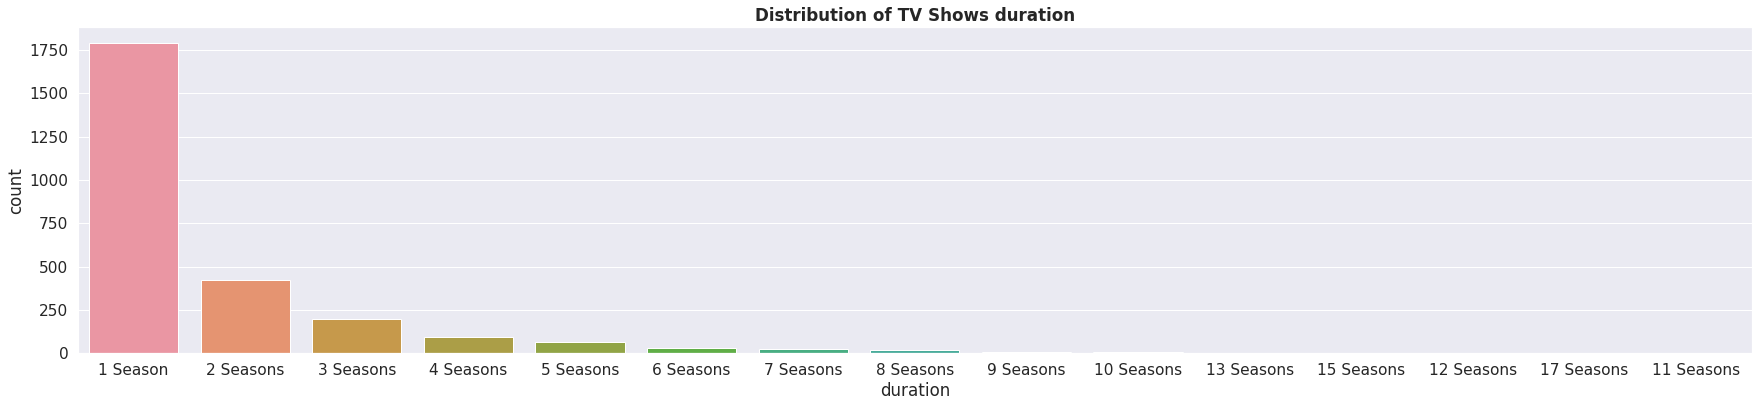

In [ ]:
#Checking the distribution of TV SHOWS
plt.figure(figsize=(30,6))
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=tv_shows['duration'],data=tv_shows,order = tv_shows['duration'].value_counts().index)

Highest number of tv_shows consists only 1 season

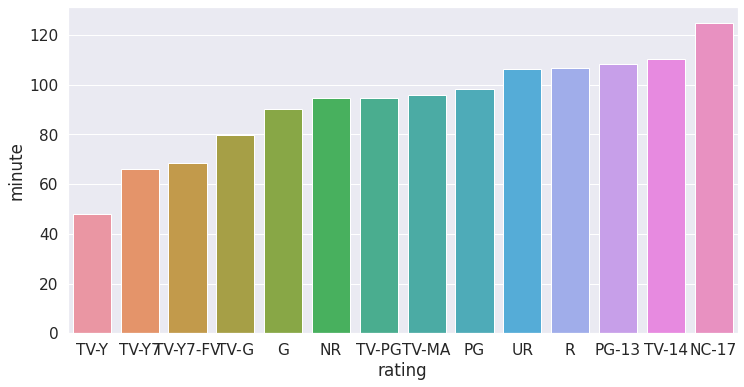

In [ ]:
movies['minute'] = movies['duration'].str.extract('(\d+)').apply(pd.to_numeric)
duration_year = movies.groupby(['rating'])['minute'].mean()
duration_df=pd.DataFrame(duration_year).sort_values('minute')
plt.figure(figsize=(12,6))
ax=sns.barplot(x=duration_df.index, y=duration_df.minute)

Those movies that have a rating of NC-17 have the longest average duration.

When it comes to movies having a TV-Y rating, they have the shortest runtime on average.

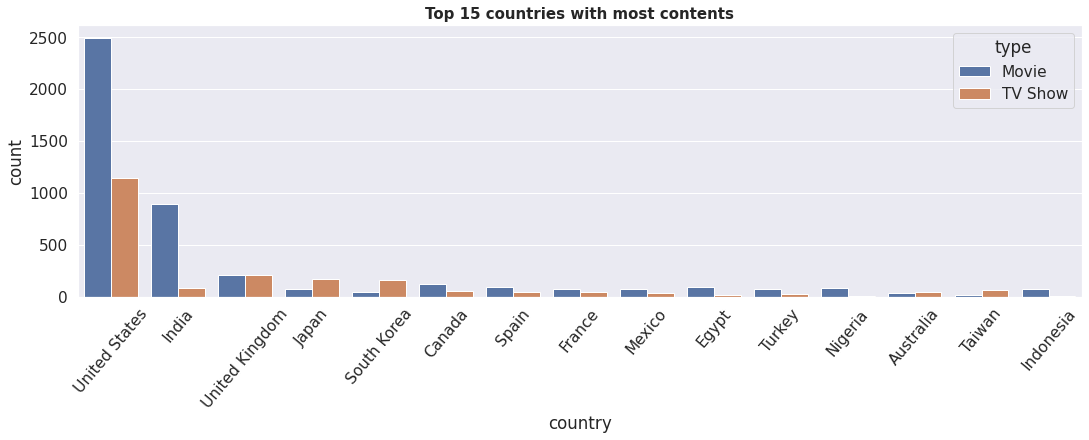

In [ ]:
#Analysing top15 countries with most content
plt.figure(figsize=(18,5))
sns.countplot(x=df['country'],order=df['country'].value_counts().index[0:15],hue=df['type'])
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

unitated states has the highest number of content on the netflix ,followed by india

In [ ]:
#top_two countries where netflix is most popular
country=df['country'].value_counts().reset_index()
country

,index,country
0,United States,3638
1,India,972
2,United Kingdom,418
3,Japan,243
4,South Korea,199
...,...,...
743,"Romania, Bulgaria, Hungary",1
744,"Uruguay, Guatemala",1
745,"France, Senegal, Belgium",1
746,"Mexico, United States, Spain, Colombia",1


<BarContainer object of 11 artists>

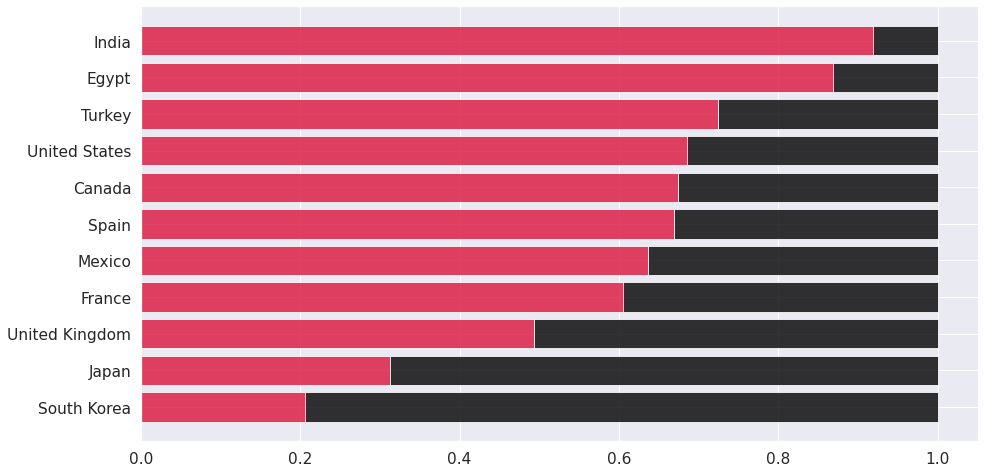

In [ ]:
# Plotting the Horizontal bar plot for top 10 country contains Movie & TV Show split
country_order = df['country'].value_counts()[:11].index
content_data = df[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

# Plotting the barh
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(content_data_ratio.index, content_data_ratio['Movie'],
        color='crimson', alpha=0.8, label='Movie')
ax.barh(content_data_ratio.index, content_data_ratio['TV Show'], left=content_data_ratio['Movie'],
        color='black', alpha=0.8, label='TV Show')

India has highest number of movies on Netflix and South Korea has TV Shows more than Movies

In [ ]:
# Preparing data for heatmap
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap

country,Canada,Egypt,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
target_ages,,,,,,,,,,
Kids,0.176796,0.009434,0.096774,0.014403,0.012346,0.018182,0.025126,0.020690,0.100478,0.084387
Older Kids,0.220994,0.037736,0.056452,0.155350,0.246914,0.081818,0.115578,0.041379,0.196172,0.195162
Teens,0.160221,0.679245,0.177419,0.569959,0.382716,0.127273,0.417085,0.096552,0.191388,0.255910
Adults,0.441989,0.273585,0.669355,0.260288,0.358025,0.772727,0.442211,0.841379,0.511962,0.464541


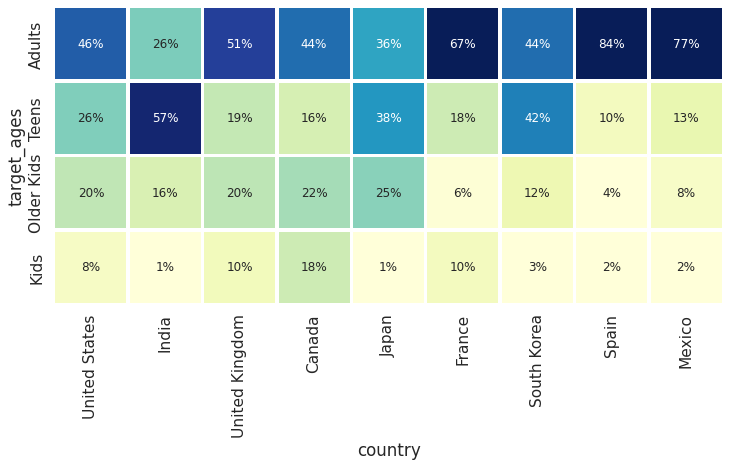

In [ ]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

The US and UK are closely aligned with their Netflix target ages, but radically different from, example, India or Japan!

Also, Mexico and Spain have similar content on Netflix for different age groups.

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'])
movies['year_added'] = df['date_added'].dt.year
df

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count
0,s1,Movie,Dick Johnson Is Dead,No Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens,9,1
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults,9,1
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Adults,9,1
3,s4,TV Show,Jailbirds New Orleans,No Cast,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Adults,9,1
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Adults,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",Adults,11,1
8803,s8804,TV Show,Zombie Dumb,No Cast,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",Older Kids,7,1
8804,s8805,Movie,Zombieland,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Adults,11,1
8805,s8806,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Older Kids,1,1


Some movies and TV shows were actually released in the past and they were added later on Netflix. But some movies and TV shows were released on Netflix itself. Named those as Netflix Originals.

In [ ]:
movies['originals'] = np.where(movies['release_year'] == movies['year_added'], 'Yes', 'No')

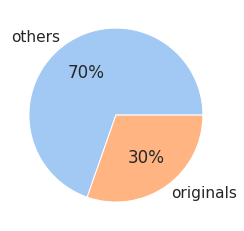

In [ ]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(movies['originals'].value_counts(), labels = ['others','originals'], colors = colors, autopct='%.0f%%')
plt.show()

30% movies released on Netflix. 70% movies added on Netflix were released earlier by different mode.

**Making some hypothesis
                      1.HYPOTHESIS TESTING**

HO:movies rated for kids and older kids are at least two hours long.

H1:movies rated for kids and older kids are not at least two hours long.

In [ ]:
#making copy of df_clean_frame
df_hypothesis=df.copy()
#head of df_hypothesis
df_hypothesis.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count
0,s1,Movie,Dick Johnson Is Dead,No Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens,9,1
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults,9,1
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Adults,9,1
3,s4,TV Show,Jailbirds New Orleans,No Cast,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Adults,9,1
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Adults,9,1


In [ ]:
#filtering movie from Type_of_show column
df_hypothesis = df_hypothesis[df_hypothesis["type"] == "Movie"]

In [ ]:
#with respect to each ratings assigning it into group of categories
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df_hypothesis['target_ages'] = df_hypothesis['rating'].replace(ratings_ages)
#let's see unique target ages
df_hypothesis['target_ages'].unique()

array(['Teens', 'Older Kids', 'Adults', 'Kids'], dtype=object)

In [ ]:
#Another category is target_ages (4 classes).
df_hypothesis['target_ages'] = pd.Categorical(df_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

#from duration feature extractin string part and after extracting Changing the object type to numeric
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
df_hypothesis.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count
0,s1,Movie,Dick Johnson Is Dead,No Cast,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",Teens,9,1
6,s7,Movie,My Little Pony: A New Generation,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Older Kids,9,1
7,s8,Movie,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Adults,9,1
9,s10,Movie,The Starling,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...,Teens,9,1
12,s13,Movie,Je Suis Karl,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...,Adults,9,1


In [ ]:
#group_by duration and target_ages
group_by_= df_hypothesis[['duration','target_ages']].groupby(by='target_ages')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

,target_ages,duration
0,Kids,67.255034
1,Older Kids,91.640577
2,Teens,109.789776
3,Adults,98.831633


In [ ]:
#In A and B variable grouping values
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')
#mean and std. calutation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids duration    67.255034
dtype: float64 
 Mean for  movies rated for older kids duration    91.640577
dtype: float64
Std for  movies rated for Older Kids duration    30.514448
dtype: float64 
 Std for  movies rated for kids duration    33.745463
dtype: float64


In [ ]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

298 971
dof 1267
SP_2 = duration    1090.086548
dtype: float64
SP duration    33.016459
dtype: float64
tvalue -11.152927506843639


In [ ]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9618380970304778

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9618380970304774

Because the t-value is not in the range, the null hypothesis is rejected.

As a result, movies rated for kids and older kids are not at least two hours long.

2. HYPOTHESIS TESTING

H1:The duration which is more than 90 mins are movies

HO:The duration which is more than 90 mins are NOT movies

In [ ]:
#making copy of df_clean_frame
df_hypothesis=df.copy()
#head of df_hypothesis
df_hypothesis.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count
0,s1,Movie,Dick Johnson Is Dead,No Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens,9,1
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults,9,1
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Adults,9,1
3,s4,TV Show,Jailbirds New Orleans,No Cast,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Adults,9,1
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Adults,9,1


In [ ]:
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])

In [ ]:
df_hypothesis['type'] = pd.Categorical(df_hypothesis['type'], categories=['Movie','TV Show'])
df_hypothesis.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count
0,s1,Movie,Dick Johnson Is Dead,No Cast,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",Teens,9,1
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults,9,1
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Adults,9,1
3,s4,TV Show,Jailbirds New Orleans,No Cast,United States,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Adults,9,1
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Adults,9,1


In [ ]:
#group_by duration and TYPE
group_by_= df_hypothesis[['duration','type']].groupby('type')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

,type,duration
0,Movie,99.584884
1,TV Show,1.751877


In [ ]:
#In A and B variable grouping values
A= group_by_.get_group('Movie')
B= group_by_.get_group('TV Show')
#mean and std
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean  {}'.format(M1,M2))
print('Std  {}'.format(S2,S1))

Mean  duration    99.584884
dtype: float64
Std  duration    1.550622
dtype: float64


In [ ]:

#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

6126 2664
dof 8788
SP_2 = duration    244.079364
dtype: float64
SP duration    15.62304
dtype: float64
tvalue 269.82428850802495


In [ ]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.960233965473127

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9602339654731264

Because the t-value is not in the range, the null hypothesis is rejected.

As a result, The duration which is more than 90 mins are movies

## **Feature engineering**

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df.dtypes

show_id                 object
type                  category
title                   object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
target_ages           category
month                    int64
count                    int64
dtype: object

In [ ]:
df['description'].astype(str)

0       As her father nears the end of his life, filmm...
1       After crossing paths at a party, a Cape Town t...
2       To protect his family from a powerful drug lor...
3       Feuds, flirtations and toilet talk go down amo...
4       In a city of coaching centers known to train I...
                              ...                        
8802    A political cartoonist, a crime reporter and a...
8803    While living alone in a spooky town, a young g...
8804    Looking to survive in a world taken over by zo...
8805    Dragged from civilian life, a former superhero...
8806    A scrappy but poor boy worms his way into a ty...
Name: description, Length: 8790, dtype: object

In [ ]:
# after above all the changes, those features are in list format, so making list of description feature
df['description'] = df['description'].apply(lambda x: x.split(' '))

In [ ]:
# converting text feature to string from list
df['description']= df['description'].apply(lambda x: " ".join(x))
# making all the words in text feature to lowercase
df['description']= df['description'].apply(lambda x: x.lower())

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
# applying above function on text feature
df['description']= df['description'].apply(remove_punctuation)

In [ ]:
df['description'][0:10]

0    as her father nears the end of his life filmma...
1    after crossing paths at a party a cape town te...
2    to protect his family from a powerful drug lor...
3    feuds flirtations and toilet talk go down amon...
4    in a city of coaching centers known to train i...
5    the arrival of a charismatic young priest brin...
6    equestrias divided but a brighteyed hero belie...
7    on a photo shoot in ghana an american model sl...
8    a talented batch of amateur bakers face off in...
9    a woman adjusting to life after a loss contend...
Name: description, dtype: object

In [ ]:
# using nltk library to download stopwords
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
sw=stopwords.words('english')
#Defining stopwords
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word for word in text.split() if word not in sw]
    # joining the list of words with space separator
    return " ".join(text)
# applying above function on text feature
df['description']=df['description'].apply(stopwords)
# this is how value in text looks like after removing stopwords
df['description'][0]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'father nears end life filmmaker kirsten johnson stages death inventive comical ways help face inevitable'

In [ ]:
# importing TfidVectorizer from sklearn library
from sklearn.feature_extraction.text import TfidfVectorizer

#Applying Tfidf Vectorizer
tfidfmodel = TfidfVectorizer(max_features=5000)
X_tfidf = tfidfmodel.fit_transform(df['description'])
X_tfidf.shape

(8790, 5000)

In [ ]:
# convert X into array form for clustering
X = X_tfidf.toarray()

# **Clustering algorithms**

1.Kmean

Finding the optimal number of clusters using the elbow method

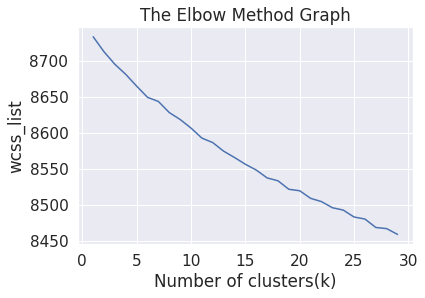

In [ ]:
#finding optimal number of clusters using the elbow method
from sklearn.cluster import KMeans
wcss_list= []  #Initializing the list for the values of WCSS

#Using for loop for iterations from 1 to 30.
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss_list)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
#sillhoute score of clusters
sill = []
for i in range(2,30):
    model = KMeans(n_clusters=i,init ='k-means++',random_state=51)
    model.fit(X)
    y1 = model.predict(X)
    score = silhouette_score(X,y1)
    sill.append(score)
    print('cluster: %d \t Sillhoute: %0.4f'%(i,score))

cluster: 2 	 Sillhoute: 0.0014
cluster: 3 	 Sillhoute: 0.0020
cluster: 4 	 Sillhoute: 0.0020
cluster: 5 	 Sillhoute: 0.0029
cluster: 6 	 Sillhoute: 0.0032
cluster: 7 	 Sillhoute: 0.0036
cluster: 8 	 Sillhoute: 0.0039
cluster: 9 	 Sillhoute: 0.0043
cluster: 10 	 Sillhoute: 0.0043
cluster: 11 	 Sillhoute: 0.0048
cluster: 12 	 Sillhoute: 0.0050
cluster: 13 	 Sillhoute: 0.0051
cluster: 14 	 Sillhoute: 0.0056
cluster: 15 	 Sillhoute: 0.0057
cluster: 16 	 Sillhoute: 0.0056
cluster: 17 	 Sillhoute: 0.0062
cluster: 18 	 Sillhoute: 0.0066
cluster: 19 	 Sillhoute: 0.0065
cluster: 20 	 Sillhoute: 0.0062
cluster: 21 	 Sillhoute: 0.0069
cluster: 22 	 Sillhoute: 0.0068
cluster: 23 	 Sillhoute: 0.0070
cluster: 24 	 Sillhoute: 0.0071
cluster: 25 	 Sillhoute: 0.0070
cluster: 26 	 Sillhoute: 0.0073
cluster: 27 	 Sillhoute: 0.0076
cluster: 28 	 Sillhoute: 0.0075
cluster: 29 	 Sillhoute: 0.0078


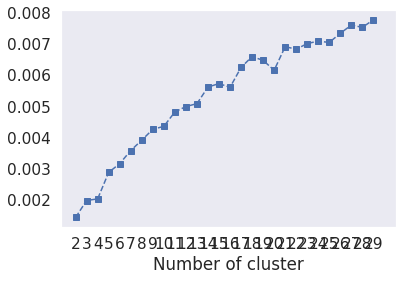

In [ ]:
#Plotting Sillhoute's score
plt.plot(sill,'bs--')
plt.xticks(list(range(0,30)),list(range(2,30)))
plt.grid(),plt.xlabel('Number of cluster')
plt.show()

In [ ]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters= 26, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(X)

### **Evaluation**

In [ ]:
#Predict the clusters and evaluate the silhouette score

score = silhouette_score(X, y_predict)
print("Silhouette score is {}".format(score))

Silhouette score is 0.007436071675938119


In [ ]:
#davies_bouldin_score of our clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, y_predict)

9.06720427430347

In [ ]:
#Adding a seperate column for the cluster
df["cluster"] = y_predict

In [ ]:
df['cluster'].value_counts()

0     2871
3      542
6      434
15     424
1      355
24     350
23     344
2      317
8      275
14     272
17     267
7      230
12     215
16     213
13     191
25     188
4      178
10     163
5      162
20     157
19     152
21     132
22     110
11      98
18      76
9       74
Name: cluster, dtype: int64

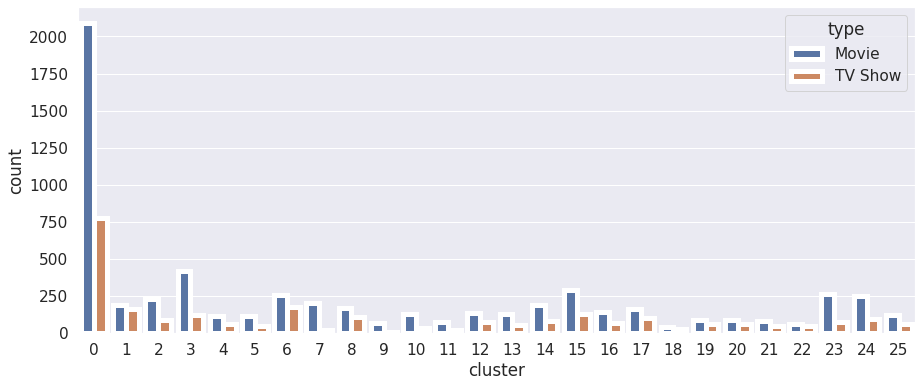

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='cluster', hue='type',lw=5, data=df, ax=ax)

In [ ]:
#SCATTER PLOT FOR CLUSTERS
fig = px.scatter(df, y="description", x="cluster",color="cluster")
fig.update_traces(marker_size=100)
fig.show()

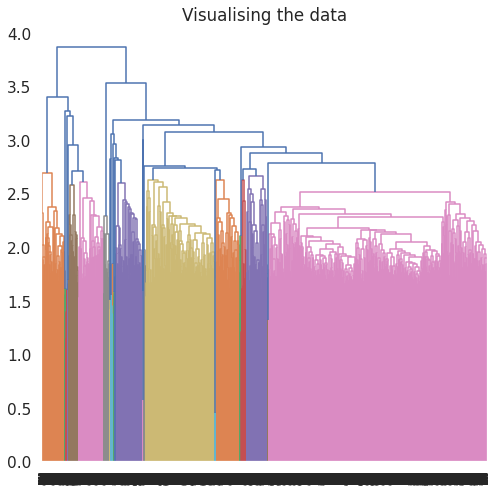

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward')))

## *2 MODEL - USING AGGLOMERATIVE CLUSTERING*

In [ ]:
#Fitting our variable in Agglomerative Clusters
from sklearn.cluster import AgglomerativeClustering
aggh = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
aggh.fit(X)
#Predicting using our model
y_hc=aggh.fit_predict(X)

In [ ]:
df_hierarchical =df.copy()
#creating a column where each row is assigned to their separate cluster
df_hierarchical['cluster'] = aggh.labels_
df_hierarchical.head()

In [ ]:
#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(X,y_hc, metric='euclidean'))

In [ ]:
#davies_bouldin_score of our clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, y_hc)

12.553080698341022

# **Conclusion**
* From elbow and sillhoute score ,optimal of 26 clusters formed , K Means is best



* For identification than Hierarchical as the evaluation metrics also indicates the same.in kmean cluster 0 has the highest number of datapoints
and evnly distributed for other cluster

* Netflix has 5372 movies and 2398 TV shows,
there are more number movies on Netflix than TV shows.

* TV-MA has the highest number of ratings for tv shows i,e adult ratings

* Highest number of movies released in 2017 and 2018

* Highest number of movies released in 2020 The number of movies on Netflix is growing significantly faster than the number of TV shows. We saw a huge increase in the number of movies and television episodes after 2015. there is a significant drop in the number of movies and television episodes produced after 2020. It appears that Netflix has focused more attention on increasing Movie content than TV Shows. Movies have increased much more dramatically than TV shows

* The most content is added to Netflix from october to january

* Documentaries are the top most genre in netflix which is fllowed by standup comedy and Drams and international movies

* Kids tv is the top most TV show genre in netflix

* Most of the movies have duration of between 50 to 150

* Highest number of tv_shows consisting of single season

* Those movies that have a rating of NC-17 have the longest average duration.

* When it comes to movies having a TV-Y rating, they have the shortest runtime on average

* unitated states has the highest number of content on the netflix ,followed by india

* India has highest number of movies in netflix

* 30% movies released on Netflix.

* 70% movies added on Netflix were released earlier by different mode.




### **How is your Project useful to stakeholders?**

### **Making critical business decisions that will increase income can be aided by this project's deep understanding into how users interact with and behave when viewing Netflix material.**